# Analisi Chimico-Qualitativa del Vino: Insight su Qualità, Differenze tra Tipologie e Fattori Determinanti


L’analisi si propone di esplorare il Wine Quality Dataset per comprendere in che misura le caratteristiche chimiche dei vini influenzino la qualità percepita. Attraverso un processo strutturato di pulizia dati, individuazione e gestione degli outlier, e tecniche di statistica descrittiva e predittiva, sono stati analizzati sia vini rossi che bianchi. L’obiettivo è identificare le variabili più rilevanti, le differenze tra tipologie di vino e le variazioni chimiche associate ai diversi livelli qualitativi.


# Richieste

- Quali caratteristiche chimiche hanno la maggiore influenza sulla qualità del vino?
- Esistono differenze significative tra i vini rossi e bianchi in termini di caratteristiche chimiche e qualità?
- Come variano le caratteristiche chimiche in base alle diverse fasce di qualità del vino?

---

### ✅ **Analisi:**

---

Le caratteristiche chimiche dei vini rossi e bianchi sono differenti in base alla tipologia di vino, come evidenziato dai box plot delle variabili chimiche. La composizione chimica tra le due categorie è nettamente diversa, **ad eccezione della variabile "alcohol"**, che tende ad assumere valori simili in entrambe le tipologie.

Le caratteristiche legate alla **qualità percepita del vino**, invece, **rimangono sostanzialmente invariate** al variare della tipologia: **la distribuzione dei punteggi di qualità è simile** per i vini rossi e bianchi.

---


### 📈 Correlazioni principali tra variabili chimiche e qualità (coeff. modello OLS):

* **volatile acidity**: -1.0434 → peggiora la qualità (**molto significativa**)
* **citric acid**: +0.3505 → migliora la qualità (**significativa**)
* **residual sugar**: +0.0399 → migliora leggermente la qualità (**significativa**)
* **chlorides**: -0.9603 → peggiora la qualità (**significativa**)
* **free sulfur dioxide**: +0.0062 → migliora la qualità (**significativa**)
* **total sulfur dioxide**: -0.0022 → peggiora leggermente la qualità (**significativa**)
* **density**: -46.2906 → peggiora fortemente la qualità (**molto significativa**)
* **pH**: +0.1857 → migliora leggermente la qualità (**debolmente significativa**)
* **sulphates**: +0.8813 → migliora la qualità (**molto significativa**)
* **alcohol**: +0.2833 → migliora la qualità (**molto significativa**)
* **fixed acidity**: +0.0070 → effetto trascurabile (**non significativa**)

---

### 📈 Variazioni delle caratteristiche chimiche in base alle fasce di qualità suddividendo in Low (≤5), Medium (6-7), High (≥8) qualità:

Vini di qualità alta tendono ad avere:

Minor volatile acidity, chlorides, density

Maggiori valori di alcohol, sulphates, citric acid

T-test conferma che le differenze di media tra fasce per molte variabili sono statisticamente significative (p-value < 0.05), soprattutto tra Low vs High e Medium vs High.

Le variabili come fixed acidity e total sulfur dioxide mostrano meno variazioni significative tra fasce di qualità.

---



# Pipeline

📥 Import dati: caricamento e concatenazione dataset

📊 EDA: boxplot, istogrammi, skewness

🧹 Outlier: Isolation Forest (asimmetriche) + IQR (simmetriche)

📈 Correlazioni: Pearson + feature importance (Random Forest)

📉 Regressione: OLS per impatto e significatività

🍷 Confronto rosso/bianco: boxplot + qualità media

🏷️ Fasce qualità: binning Low/Medium/High

🔬 Analisi per fascia: boxplot + t-test


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import IsolationForest
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

import statsmodels.api as sm

dfWhite = pd.read_csv('/content/2025-05-23-v0525-dataset-wine-white-datasetcsv.csv', sep=';')
dfRed = pd.read_csv('/content/2025-05-23-v0525-dataset-wine-red-datasetcsv.csv', sep=';')

dfWhite['type'] = 'white'
dfRed['type'] = 'red'

df = pd.concat([dfWhite, dfRed], ignore_index=True)

df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,white
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,white
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,white
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,white
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,red
6493,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,red
6494,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,red
6495,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,red


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


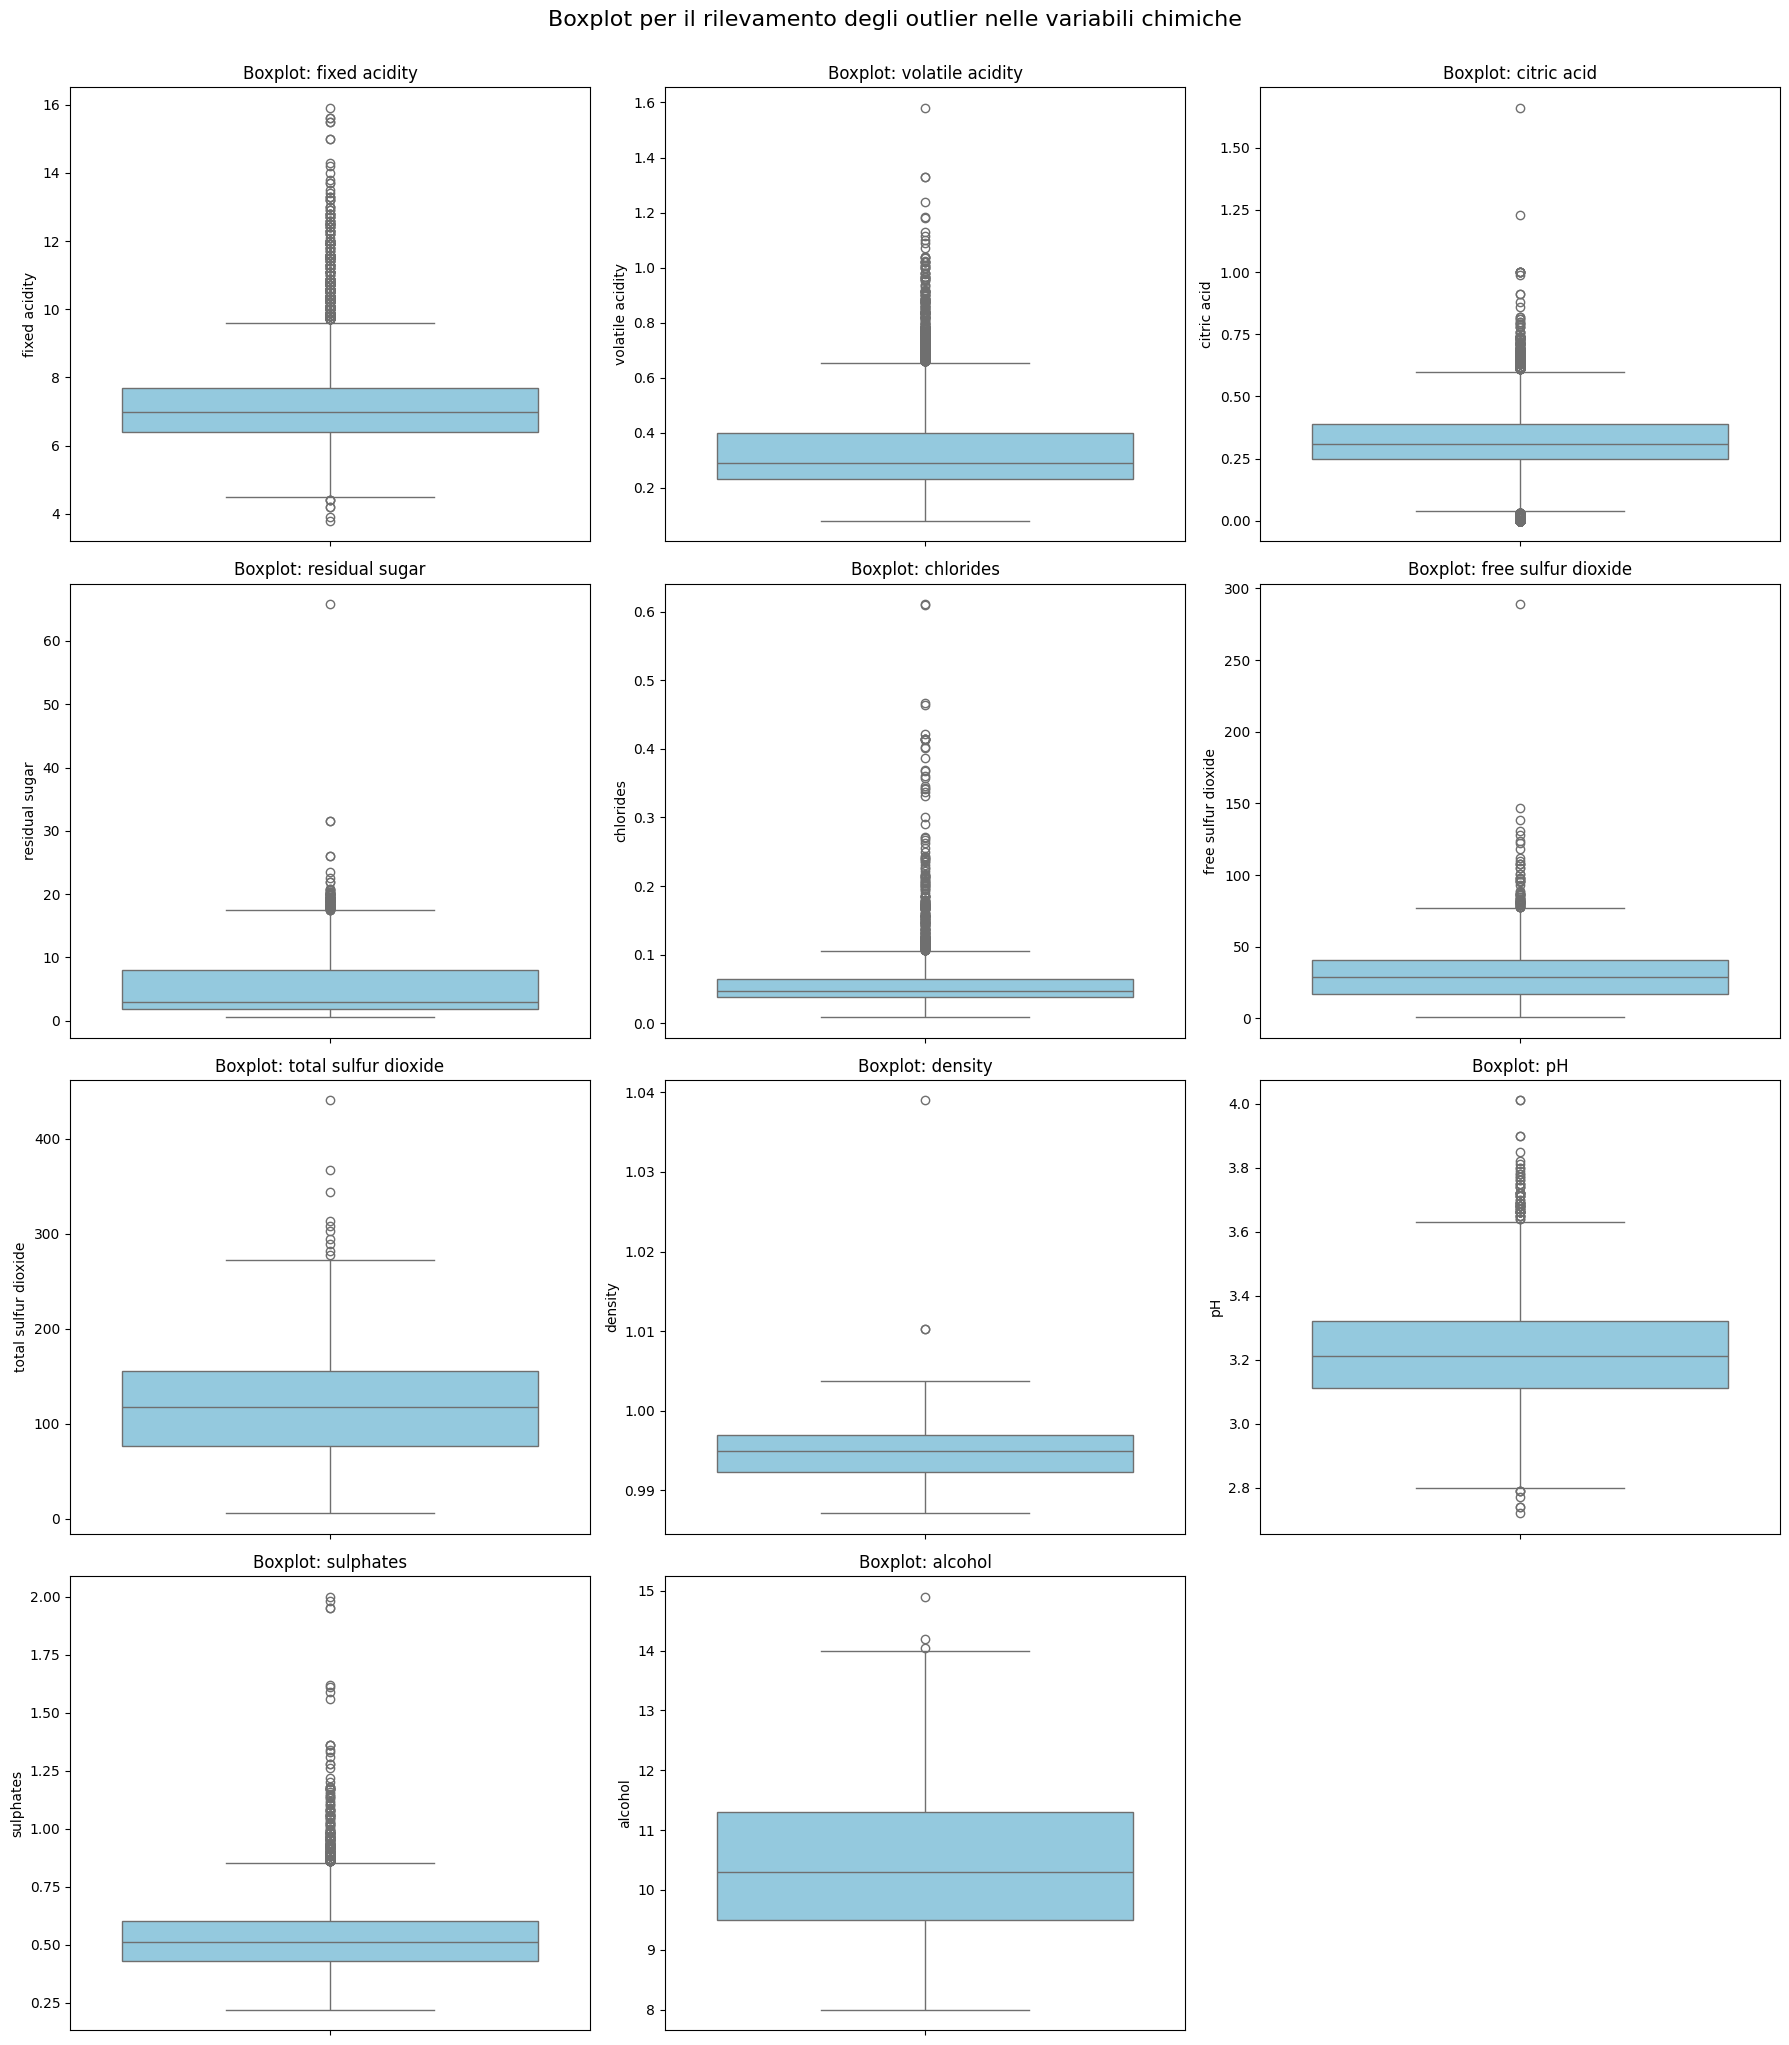

In [ ]:
"""
Visualizzazione boxplot per analisi outlier

"""

# Box plot Lista delle variabili chimiche da analizzare
variables = [
    'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
    'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
    'pH', 'sulphates', 'alcohol'
]

# Imposta la griglia: 4 righe, 3 colonne
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(18, 20))
axes = axes.flatten()

# Disegna un boxplot per ogni variabile per trovare gli outlier
for i, var in enumerate(variables):
    sns.boxplot(y=df[var], ax=axes[i], color='skyblue')
    axes[i].set_title(f'Boxplot: {var}', fontsize=12)
    axes[i].set_ylabel(var)
    axes[i].set_xlabel('')

# Rimuovi eventuali assi vuoti
for j in range(len(variables), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle("Boxplot per il rilevamento degli outlier nelle variabili chimiche", fontsize=16, y=1.02)
plt.show()

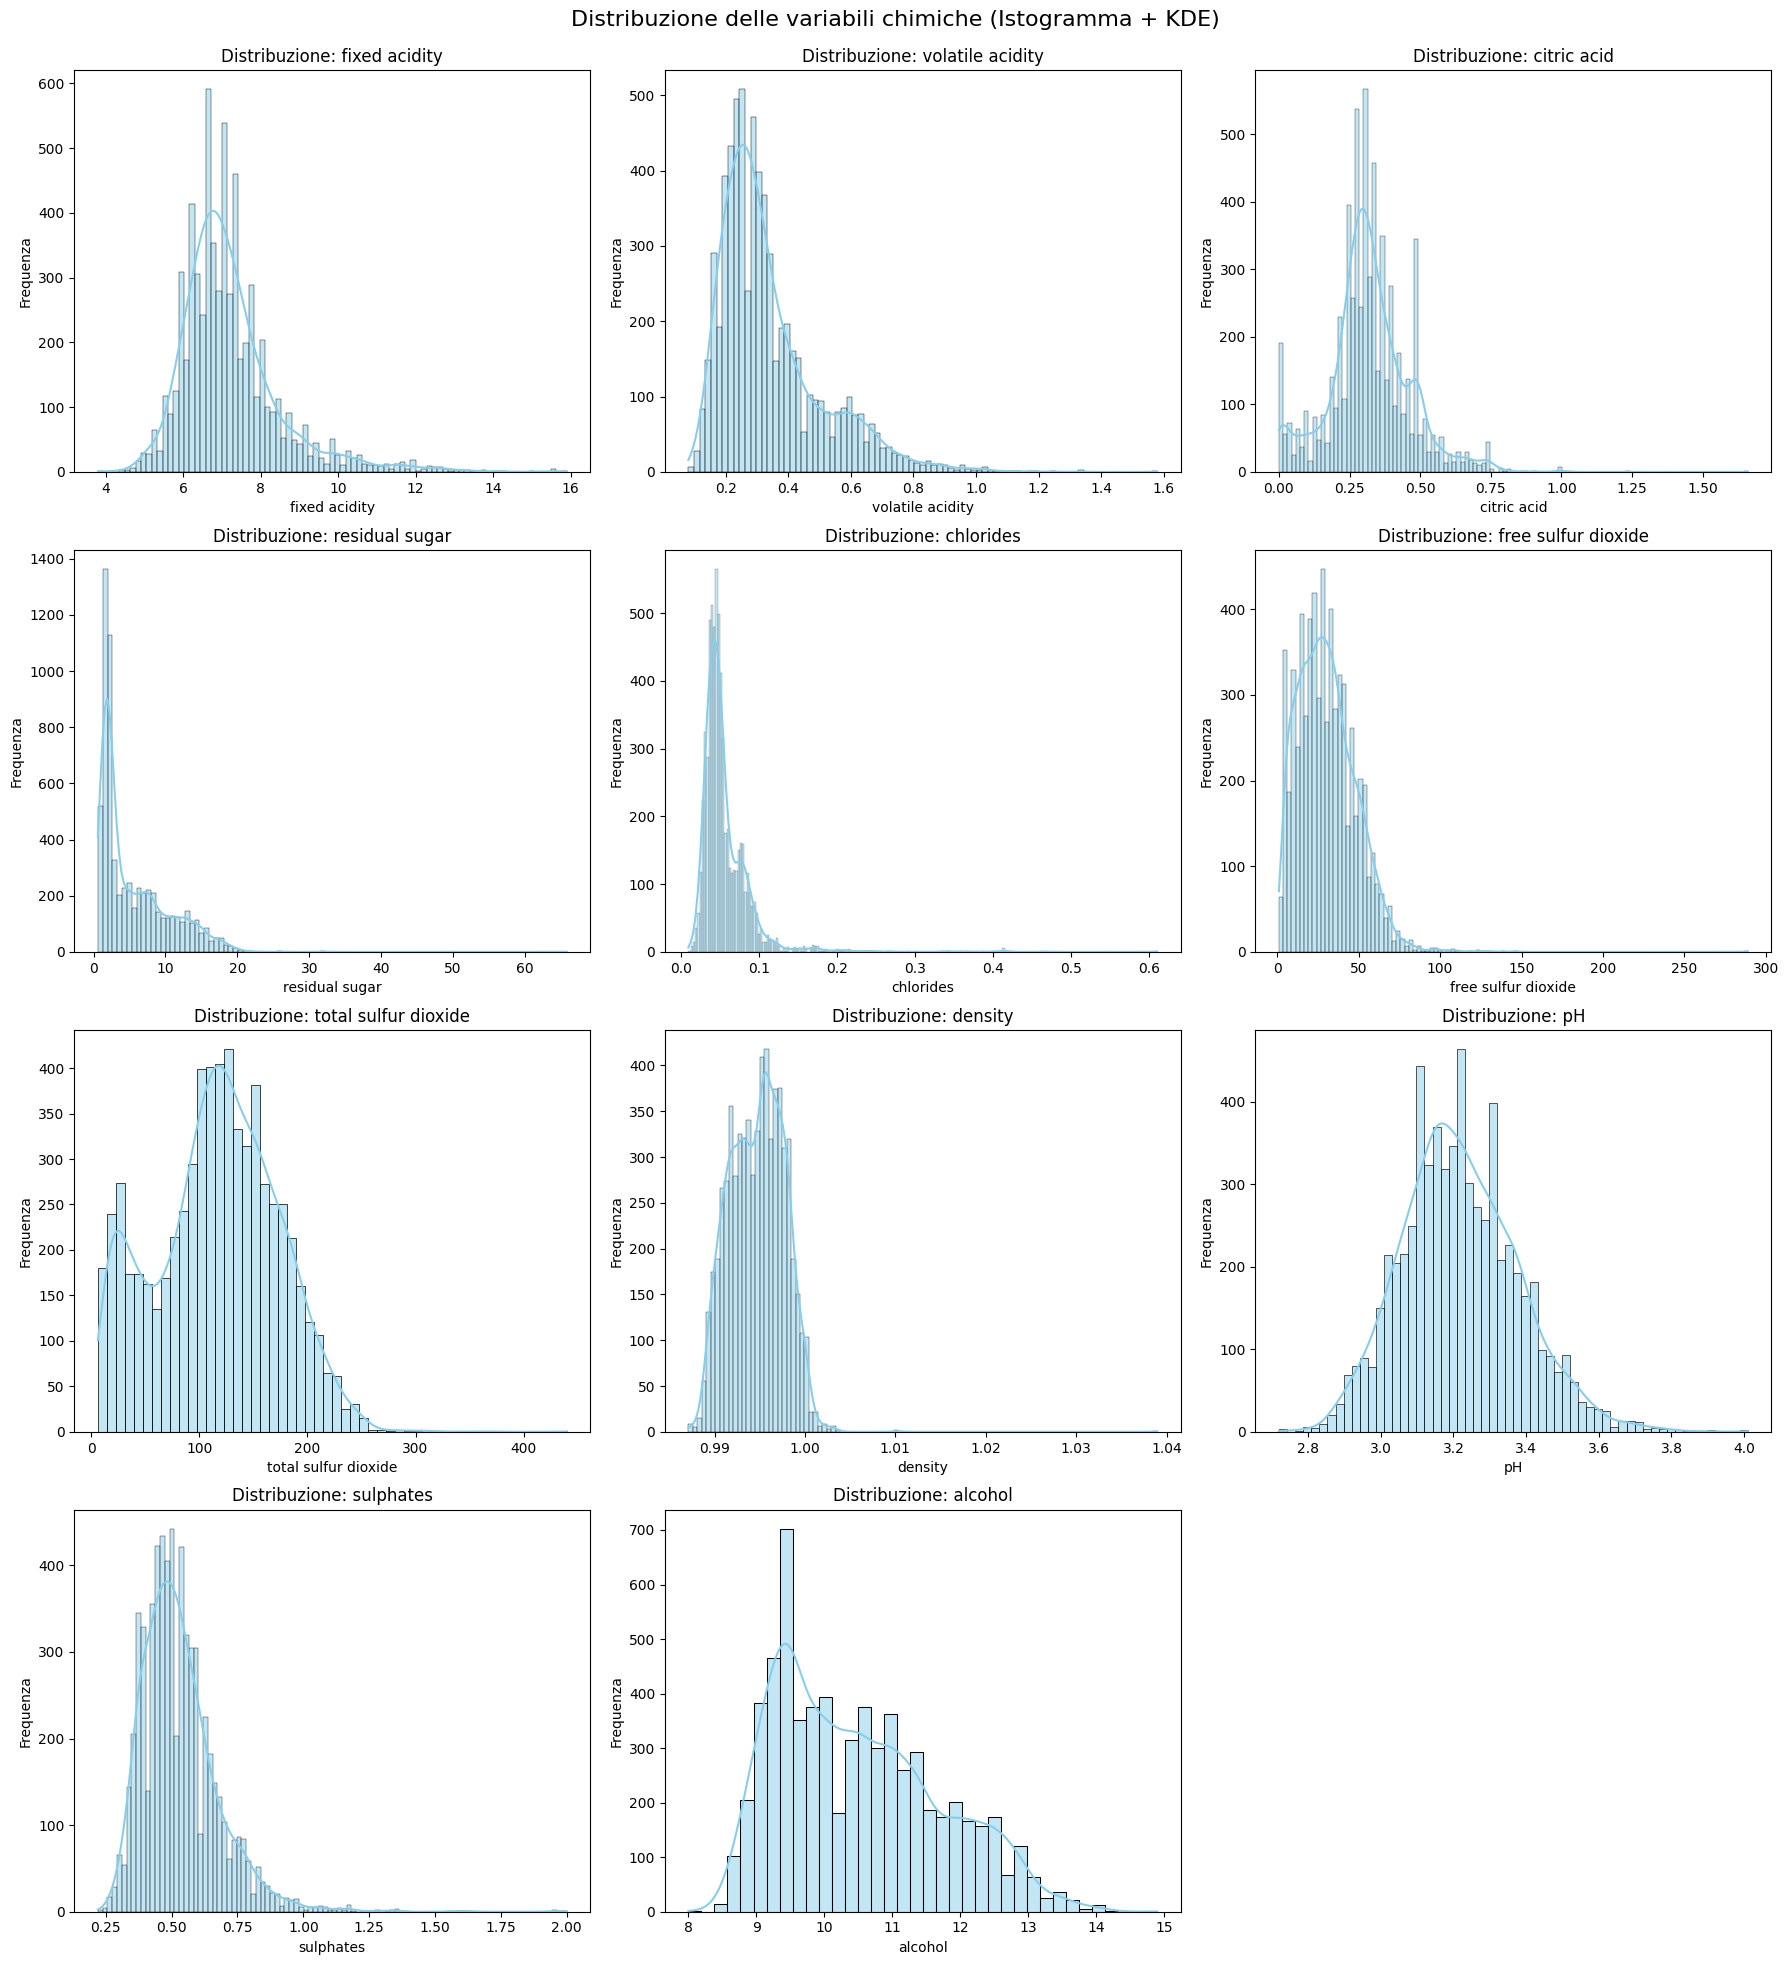

In [ ]:
"""
Visualizzazione distribuzioni variabili chimiche con Istogramma

"""

# Lista distribuzione delle variabili chimiche da analizzare
variables = [
    'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
    'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
    'pH', 'sulphates', 'alcohol'
]

# Imposta la griglia: 4 righe, 3 colonne
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(18, 20))
axes = axes.flatten()

# Disegna un istogramma + KDE per ogni variabile
for i, var in enumerate(variables):
    sns.histplot(data=df, x=var, kde=True, ax=axes[i], color='skyblue', edgecolor='black')
    axes[i].set_title(f'Distribuzione: {var}', fontsize=12)
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Frequenza')

# Rimuove eventuali assi vuoti (solo 11 variabili su 12 plot disponibili)
for j in range(len(variables), len(axes)):
    fig.delaxes(axes[j])

# Layout finale
plt.tight_layout()
plt.subplots_adjust(top=0.95)
fig.suptitle("Distribuzione delle variabili chimiche (Istogramma + KDE)", fontsize=16)
plt.show()

In [ ]:
"""
Gestione degli outlier: opzioni principali

Metodo:

IQR Rule	Distribuzione moderatamente skewed	Q1 - 1.5×IQR e Q3 + 1.5×IQR
Z-score (standard score)	Distribuzioni normali o quasi-normali	Rimuovi valori con z > 3
Isolation Forest	Dataset multivariato e grande	Identifica anomalie globali
Clipping	Quando non vuoi rimuovere righe	np.clip() per limitare valori
Log/Box-Cox trasf.	Per correggere skewness prima di ML	np.log1p(), scipy.boxcox()

Valori di riferimento per skewness (asimmetria):

Skewness	Interpretazione	Tipo di asimmetria

0	Distribuzione perfettamente simmetrica	—
da -0.5 a +0.5	Quasi simmetrica	usare IQR
da ±0.5 a ±1.0	Moderatamente asimmetrica	Valutare IQR o log
oltre ±1.0	Fortemente asimmetrica	(Isolation Forest / trasformazioni)

"""


barblot = df[variables].skew().sort_values(ascending=False)
barblot

,0
chlorides,5.399828
sulphates,1.797270
fixed acidity,1.723290
volatile acidity,1.495097
residual sugar,1.435404
free sulfur dioxide,1.220066
alcohol,0.565718
density,0.503602
citric acid,0.471731
pH,0.386839


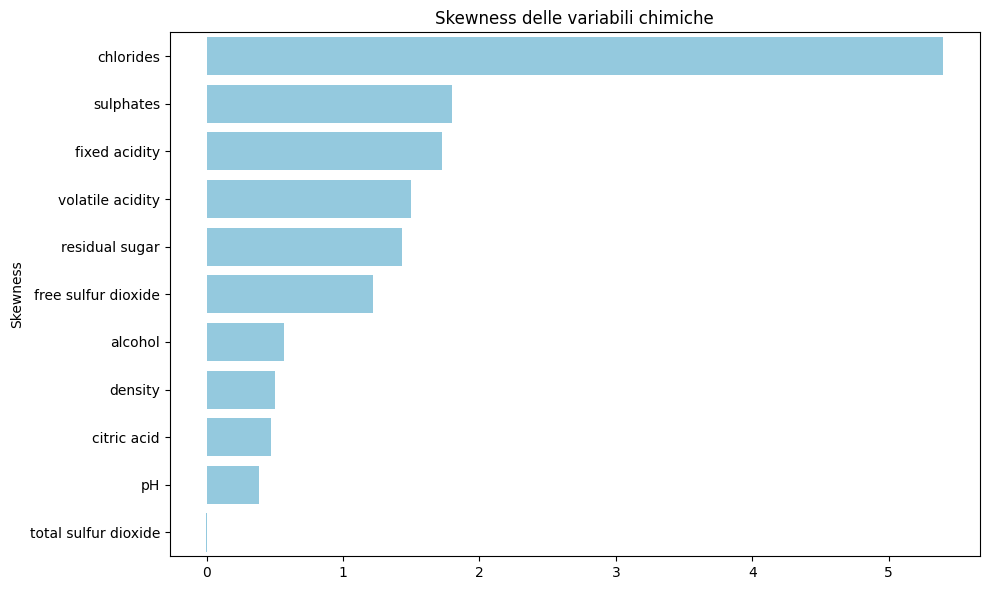

In [ ]:

plt.figure(figsize=(10,6))
sns.barplot(x=barblot.values, y=barblot.index, color='skyblue')

plt.ylabel('Skewness')
plt.title('Skewness delle variabili chimiche')
plt.tight_layout()
plt.show()

In [ ]:

# applico isolation forest solo sulle colonne fortemente asimmetriche calcolate mediante l'osservazione dei valori skew

variabili = [
        'chlorides',
        'sulphates',
        'fixed acidity',
        'volatile acidity',
        'residual sugar',
        'free sulfur dioxide'
        ]



def remove_outliers_isolation_forest(df, variabili, contamination=0.01, random_state=42):
    """
    Rimuove gli outlier da un DataFrame utilizzando Isolation Forest.

    Args:
        df (pd.DataFrame): Il DataFrame originale.
        variables (list): Lista delle colonne (numeriche) su cui applicare l'Isolation Forest.
        contamination (float): Percentuale stimata di outlier (default: 1%).
        random_state (int): Per riproducibilità.

    Returns:
        pd.DataFrame: DataFrame senza outlier nelle colonne specificate.
    """
    df_clean = df.copy()
    iso = IsolationForest(contamination=contamination, random_state=random_state)

    # Fit sui dati scelti
    preds = iso.fit_predict(df_clean[variables])

    # Isolation Forest assegna -1 agli outlier, 1 agli inlier
    df_clean = df_clean[preds == 1].reset_index(drop=True)

    return df_clean

dfIsolationForest = remove_outliers_isolation_forest(df, variabili)


print(f'Numero di record prima: {len(df)}')
print(f'Numero di record dopo: {len(dfIsolationForest)}')
print(f'Numero di record rimossi: {len(df) - len(dfIsolationForest)}')


Numero di record prima: 6497
Numero di record dopo: 6432
Numero di record rimossi: 65


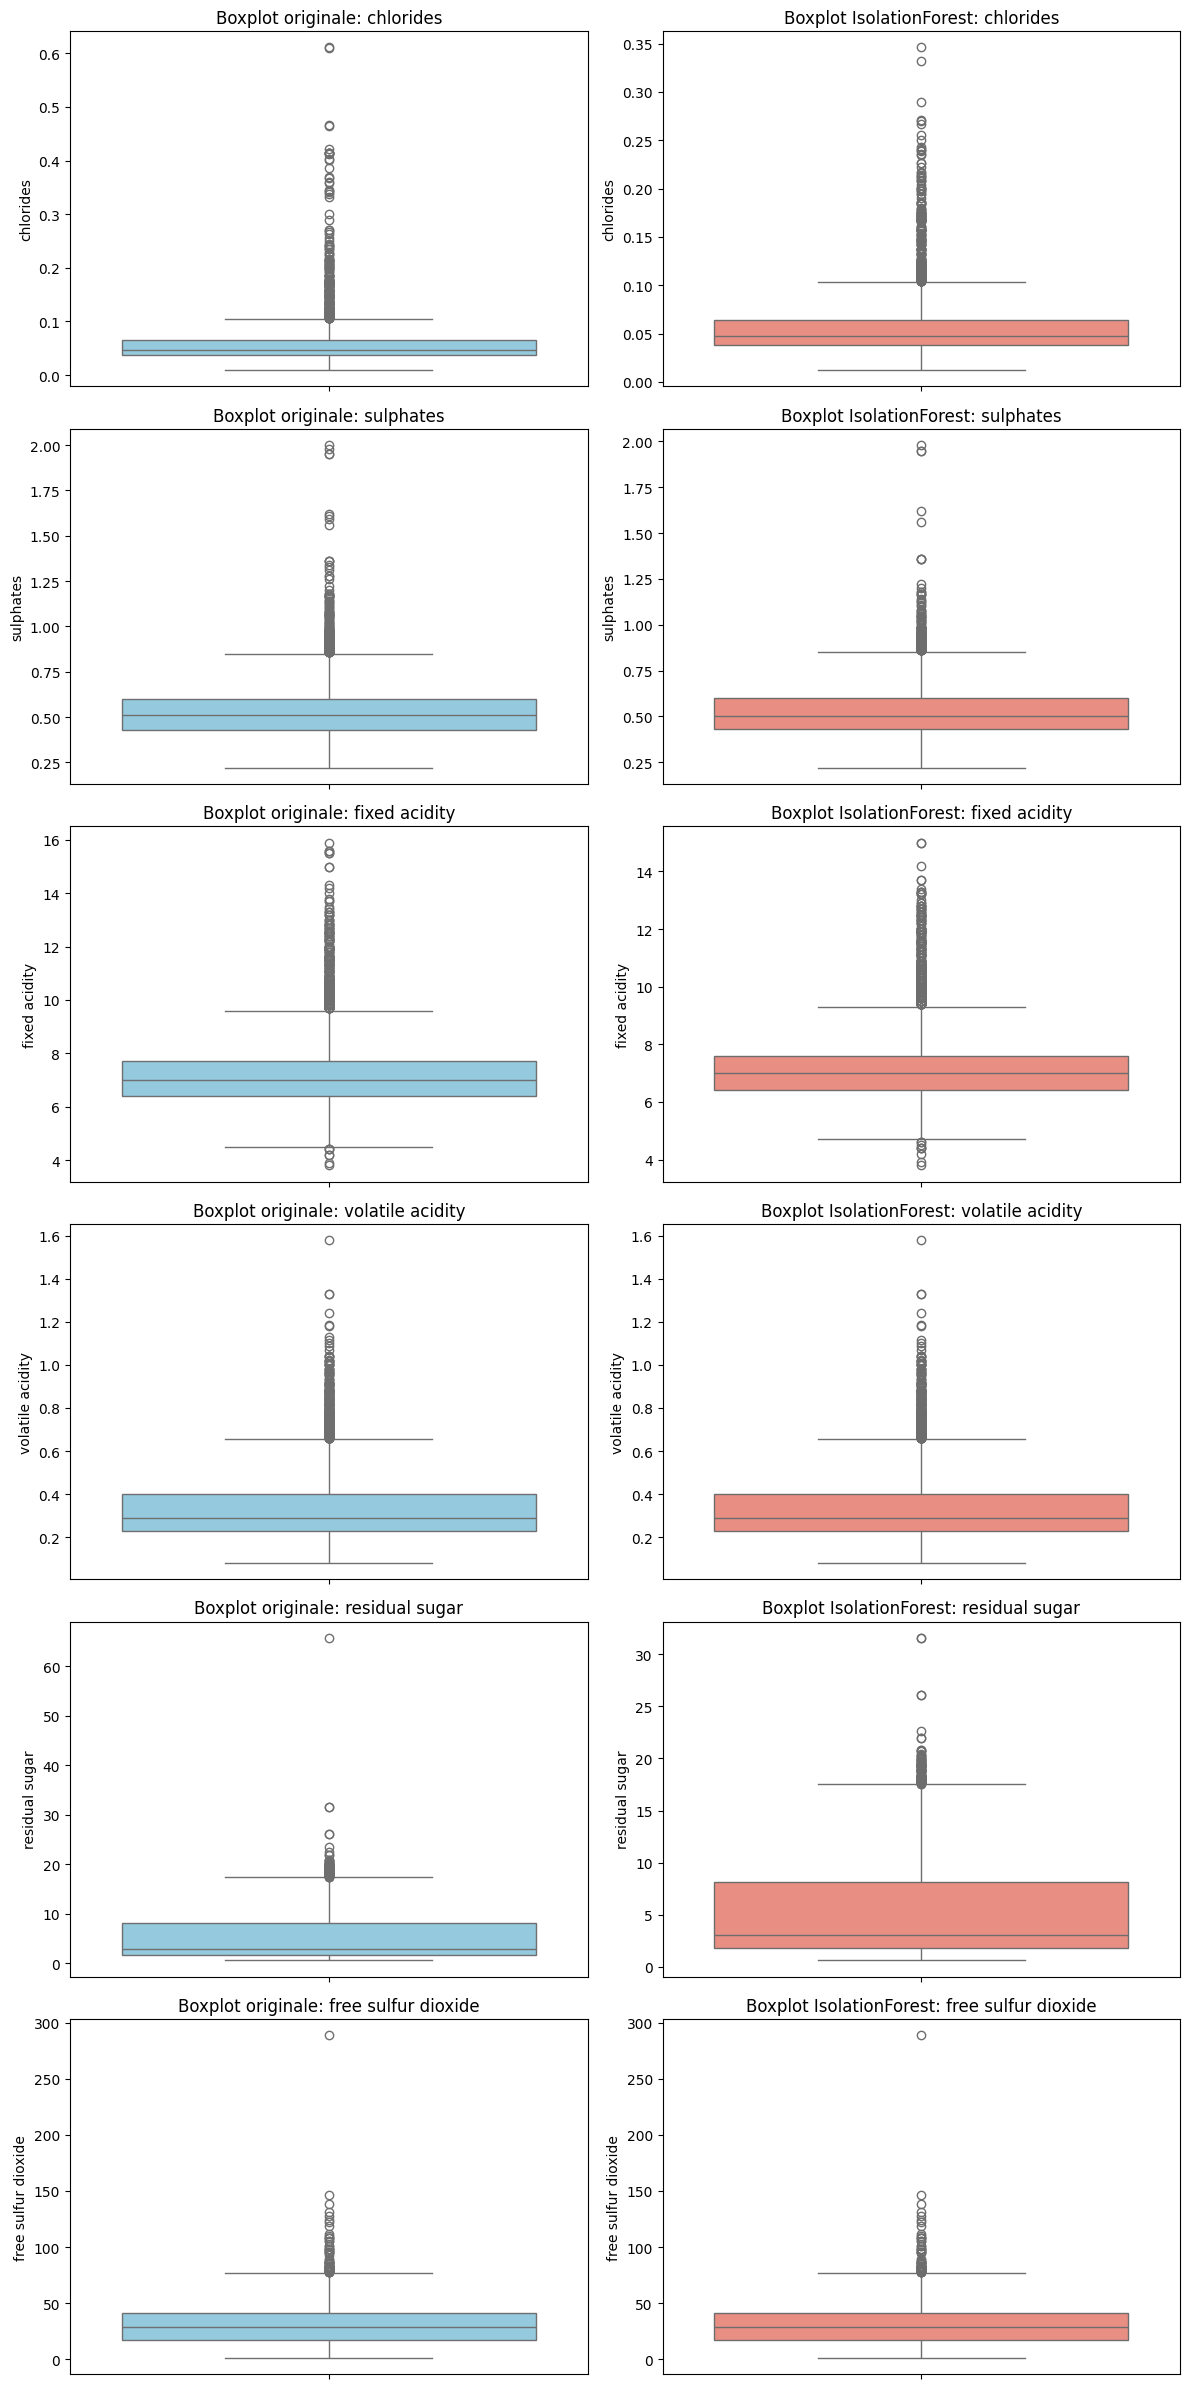

In [ ]:
# boxplot per visualizzare gli outliers prima e dopo l'applicazione di Isolation Forest

variables = [
        'chlorides',
        'sulphates',
        'fixed acidity',
        'volatile acidity',
        'residual sugar',
        'free sulfur dioxide'
        ]


fig, axes = plt.subplots(len(variables), 2, figsize=(12, 4 * len(variables)))

for i, var in enumerate(variables):
    # Boxplot per df originale
    sns.boxplot(data=df, y=var, ax=axes[i, 0], color='skyblue')
    axes[i, 0].set_title(f'Boxplot originale: {var}')
    axes[i, 0].set_ylabel(var)
    axes[i, 0].set_xlabel('')

    # Boxplot per dfIsolationForest
    sns.boxplot(data=dfIsolationForest, y=var, ax=axes[i, 1], color='salmon')
    axes[i, 1].set_title(f'Boxplot IsolationForest: {var}')
    axes[i, 1].set_ylabel(var)
    axes[i, 1].set_xlabel('')

plt.tight_layout()
plt.show()

In [ ]:
# applico metodo IQR a variabili simmetriche

# Variabili simmetriche
variables_symmetric = [
    'alcohol',
    'density',
    'citric acid',
    'pH',
    'total sulfur dioxide'
]


def replace_outliers_iqr(df, variables):
    """
    Sostituisce outlier usando la regola dell'IQR con la mediana per variabili simmetriche.

    Args:
        df (pd.DataFrame): Il DataFrame originale.
        variables (list): Lista di colonne su cui applicare la regola IQR.

    Returns:
        pd.DataFrame: DataFrame con outlier sostituiti.
    """
    df_clean = df.copy()

    for var in variables:
        Q1 = df_clean[var].quantile(0.25)
        Q3 = df_clean[var].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Calcola la mediana solo sui dati non outlier
        median_val = df_clean.loc[(df_clean[var] >= lower_bound) & (df_clean[var] <= upper_bound), var].median()

        # Sostituisce outlier con la mediana
        df_clean.loc[(df_clean[var] < lower_bound) | (df_clean[var] > upper_bound), var] = median_val

    return df_clean



# Applica la funzione su dfIsolationForest
dfFinal = replace_outliers_iqr(dfIsolationForest, variables_symmetric)

"""
Il DataFrame dfFinal:

Contiene solo le righe "non anomale" secondo Isolation Forest applicata a 6 variabili (asimmetriche).

E' stata fatta un sostituzione di eventuali outlier nelle 5 variabili simmetriche con la mediana e metodo IQR.

"""
dfFinal.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white


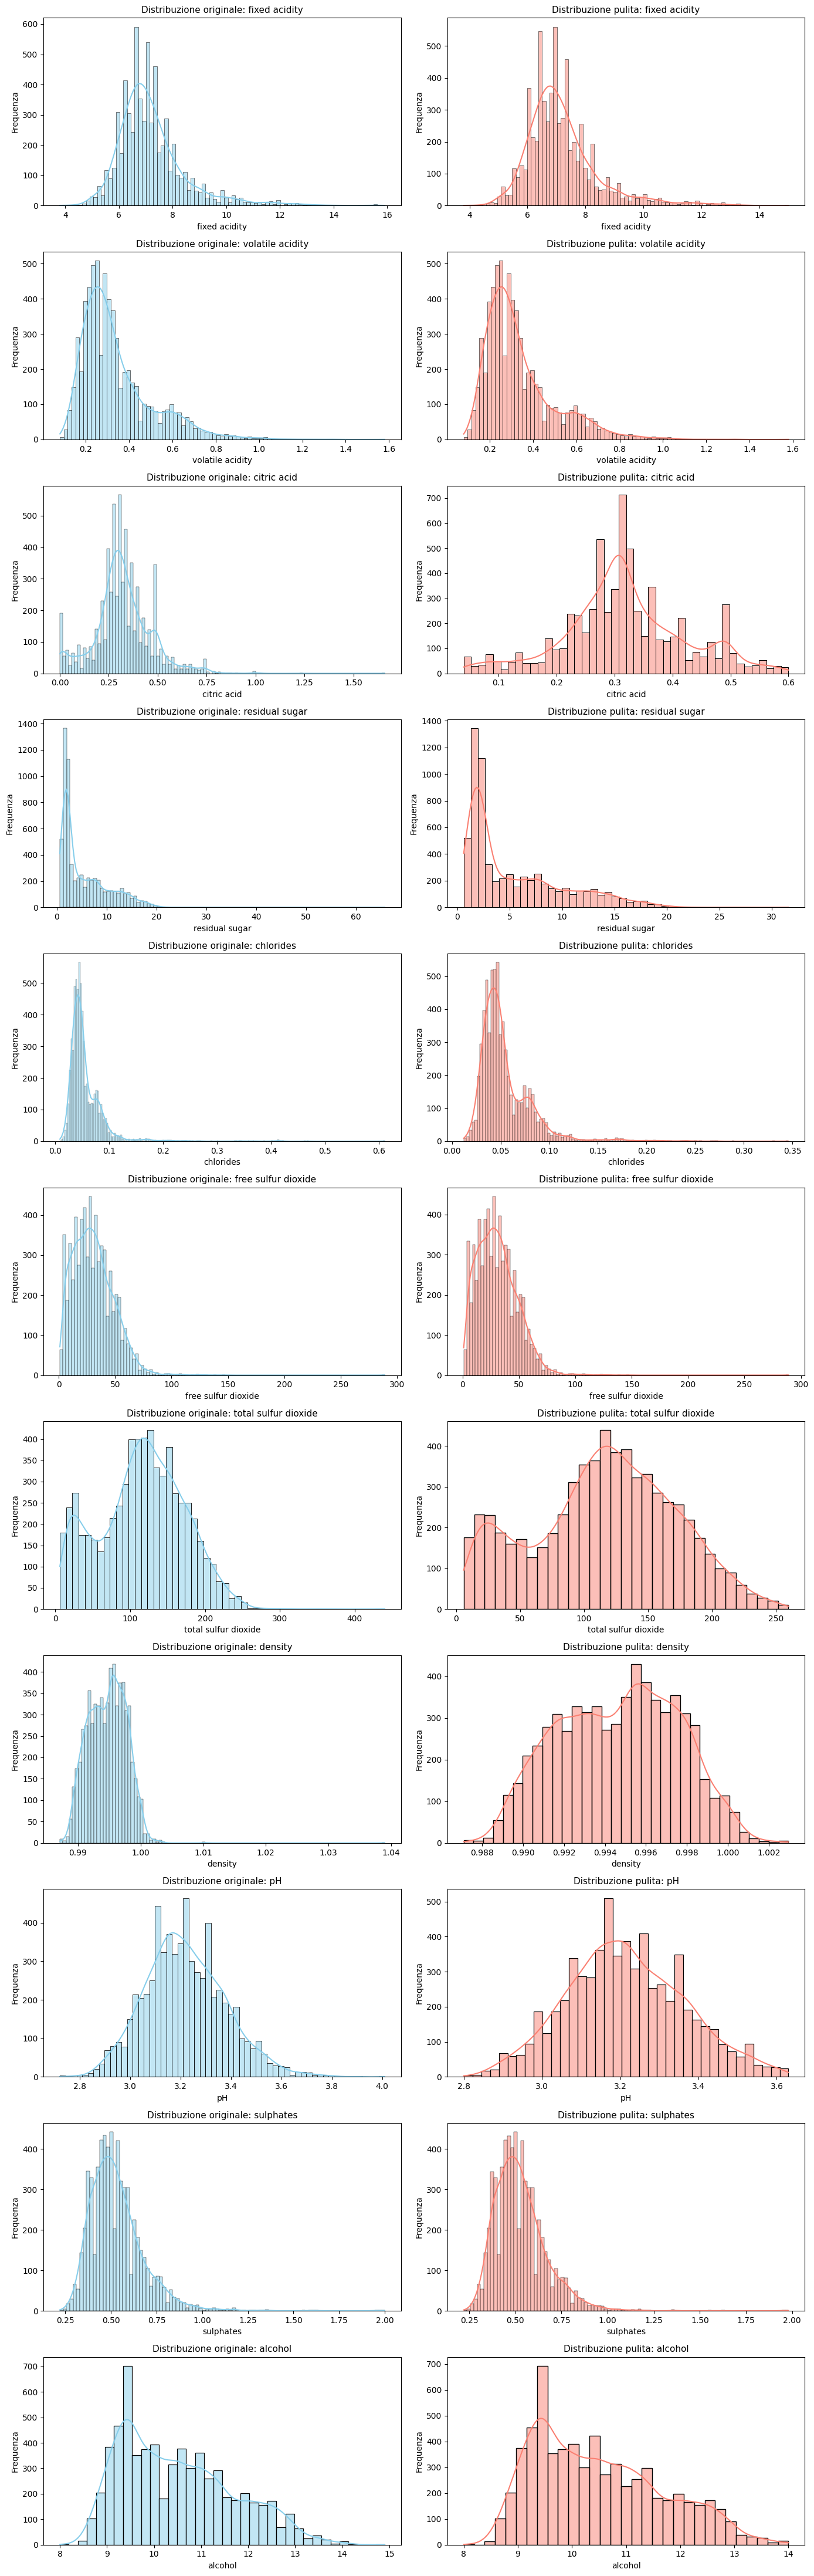

In [ ]:
# Distribuzione prima e dopo la gestione degli outliers

variables = [
    'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
    'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
    'pH', 'sulphates', 'alcohol'
]

fig, axes = plt.subplots(len(variables), 2, figsize=(14, 4 * len(variables)))

for i, var in enumerate(variables):
    # Distribuzione df originale
    sns.histplot(data=df, x=var, kde=True, ax=axes[i, 0], color='skyblue', edgecolor='black')
    axes[i, 0].set_title(f'Distribuzione originale: {var}', fontsize=11)
    axes[i, 0].set_xlabel(var)
    axes[i, 0].set_ylabel('Frequenza')

    # Distribuzione dfFinal (IsolationForest + IQR)
    sns.histplot(data=dfFinal, x=var, kde=True, ax=axes[i, 1], color='salmon', edgecolor='black')
    axes[i, 1].set_title(f'Distribuzione pulita: {var}', fontsize=11)
    axes[i, 1].set_xlabel(var)
    axes[i, 1].set_ylabel('Frequenza')

plt.tight_layout()
plt.show()

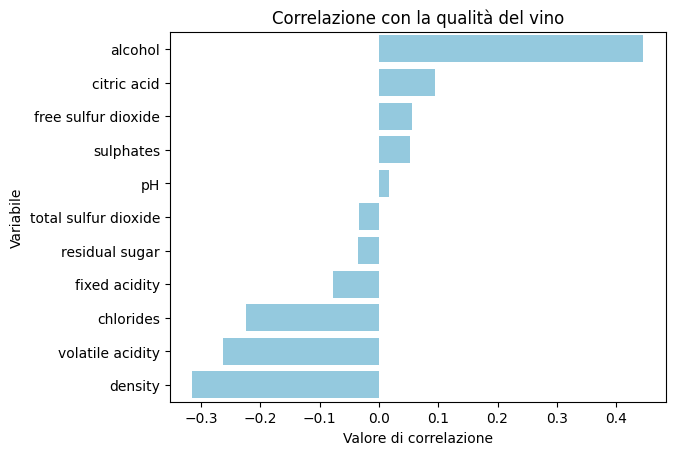

In [ ]:

"""
Analisi di correlazione (statistica di base)
Uso la matrice di correlazione tra quality e le altre variabili chimiche.

Interpretazione dei valori di correlazione

Valore di correlazione	Significato
+1	        Correlazione positiva perfetta
+0.7 ~ +1	  Forte correlazione positiva
+0.3 ~ +0.7	Correlazione positiva moderata
0 ~ +0.3	  Correlazione positiva debole o nulla
0	          Nessuna correlazione
-0.3 ~ 0	  Correlazione negativa debole o nulla
-0.7 ~ -0.3	Correlazione negativa moderata
-1 ~ -0.7	  Forte correlazione negativa
-1	        Correlazione negativa perfetta

"""
dfCorrelazioni = dfFinal.copy()

# eliminio da colonna categorica: "Type"
dfCorrelazioni.drop(columns='type', inplace=True)

# creo la tabella delle correlazioni con Qualità e successivamente droppo la colonna 'quality' e ordino
correlazioni = dfCorrelazioni.corr()['quality'].drop('quality').sort_values(ascending=False)

sns.barplot(x=correlazioni.values, y=correlazioni.index, color='skyblue')
plt.title('Correlazione con la qualità del vino')
plt.xlabel('Valore di correlazione')
plt.ylabel('Variabile')
plt.show()

Mean Squared Error: 0.37
R-squared: 0.50


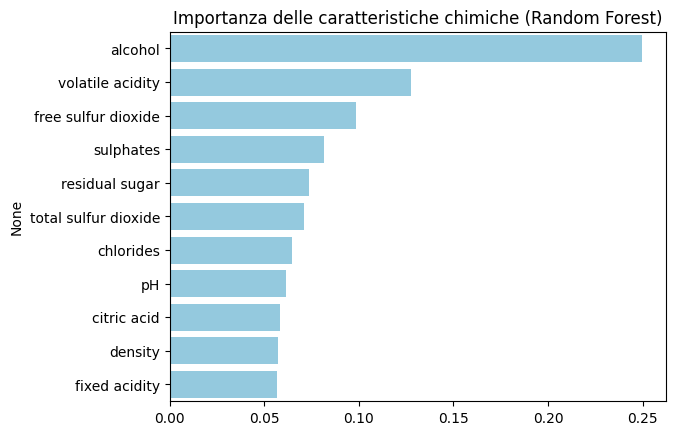

In [ ]:
"""
Feature importance con ML
Applico un modello predittivo della qualità (quality), e uso le importanze delle feature per vedere quali contano di più.

"""

X = dfCorrelazioni.drop(columns='quality')
y = dfFinal['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

sns.barplot(x=importances.values, y=importances.index, color='skyblue')
plt.title('Importanza delle caratteristiche chimiche (Random Forest)')
plt.show()

In [ ]:
"""
Regressione lineare con statsmodels

Per capire quanto e in che direzione ogni variabile influenza la qualità.

p-value < 0.05 → variabili significative
coef → impatto positivo/negativo

"""

X = sm.add_constant(X)  # aggiunge l'intercetta
model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.290
Method:                 Least Squares   F-statistic:                     239.6
Date:                Sun, 29 Jun 2025   Prob (F-statistic):               0.00
Time:                        08:37:38   Log-Likelihood:                -7145.5
No. Observations:                6432   AIC:                         1.432e+04
Df Residuals:                    6420   BIC:                         1.440e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   63.9760 

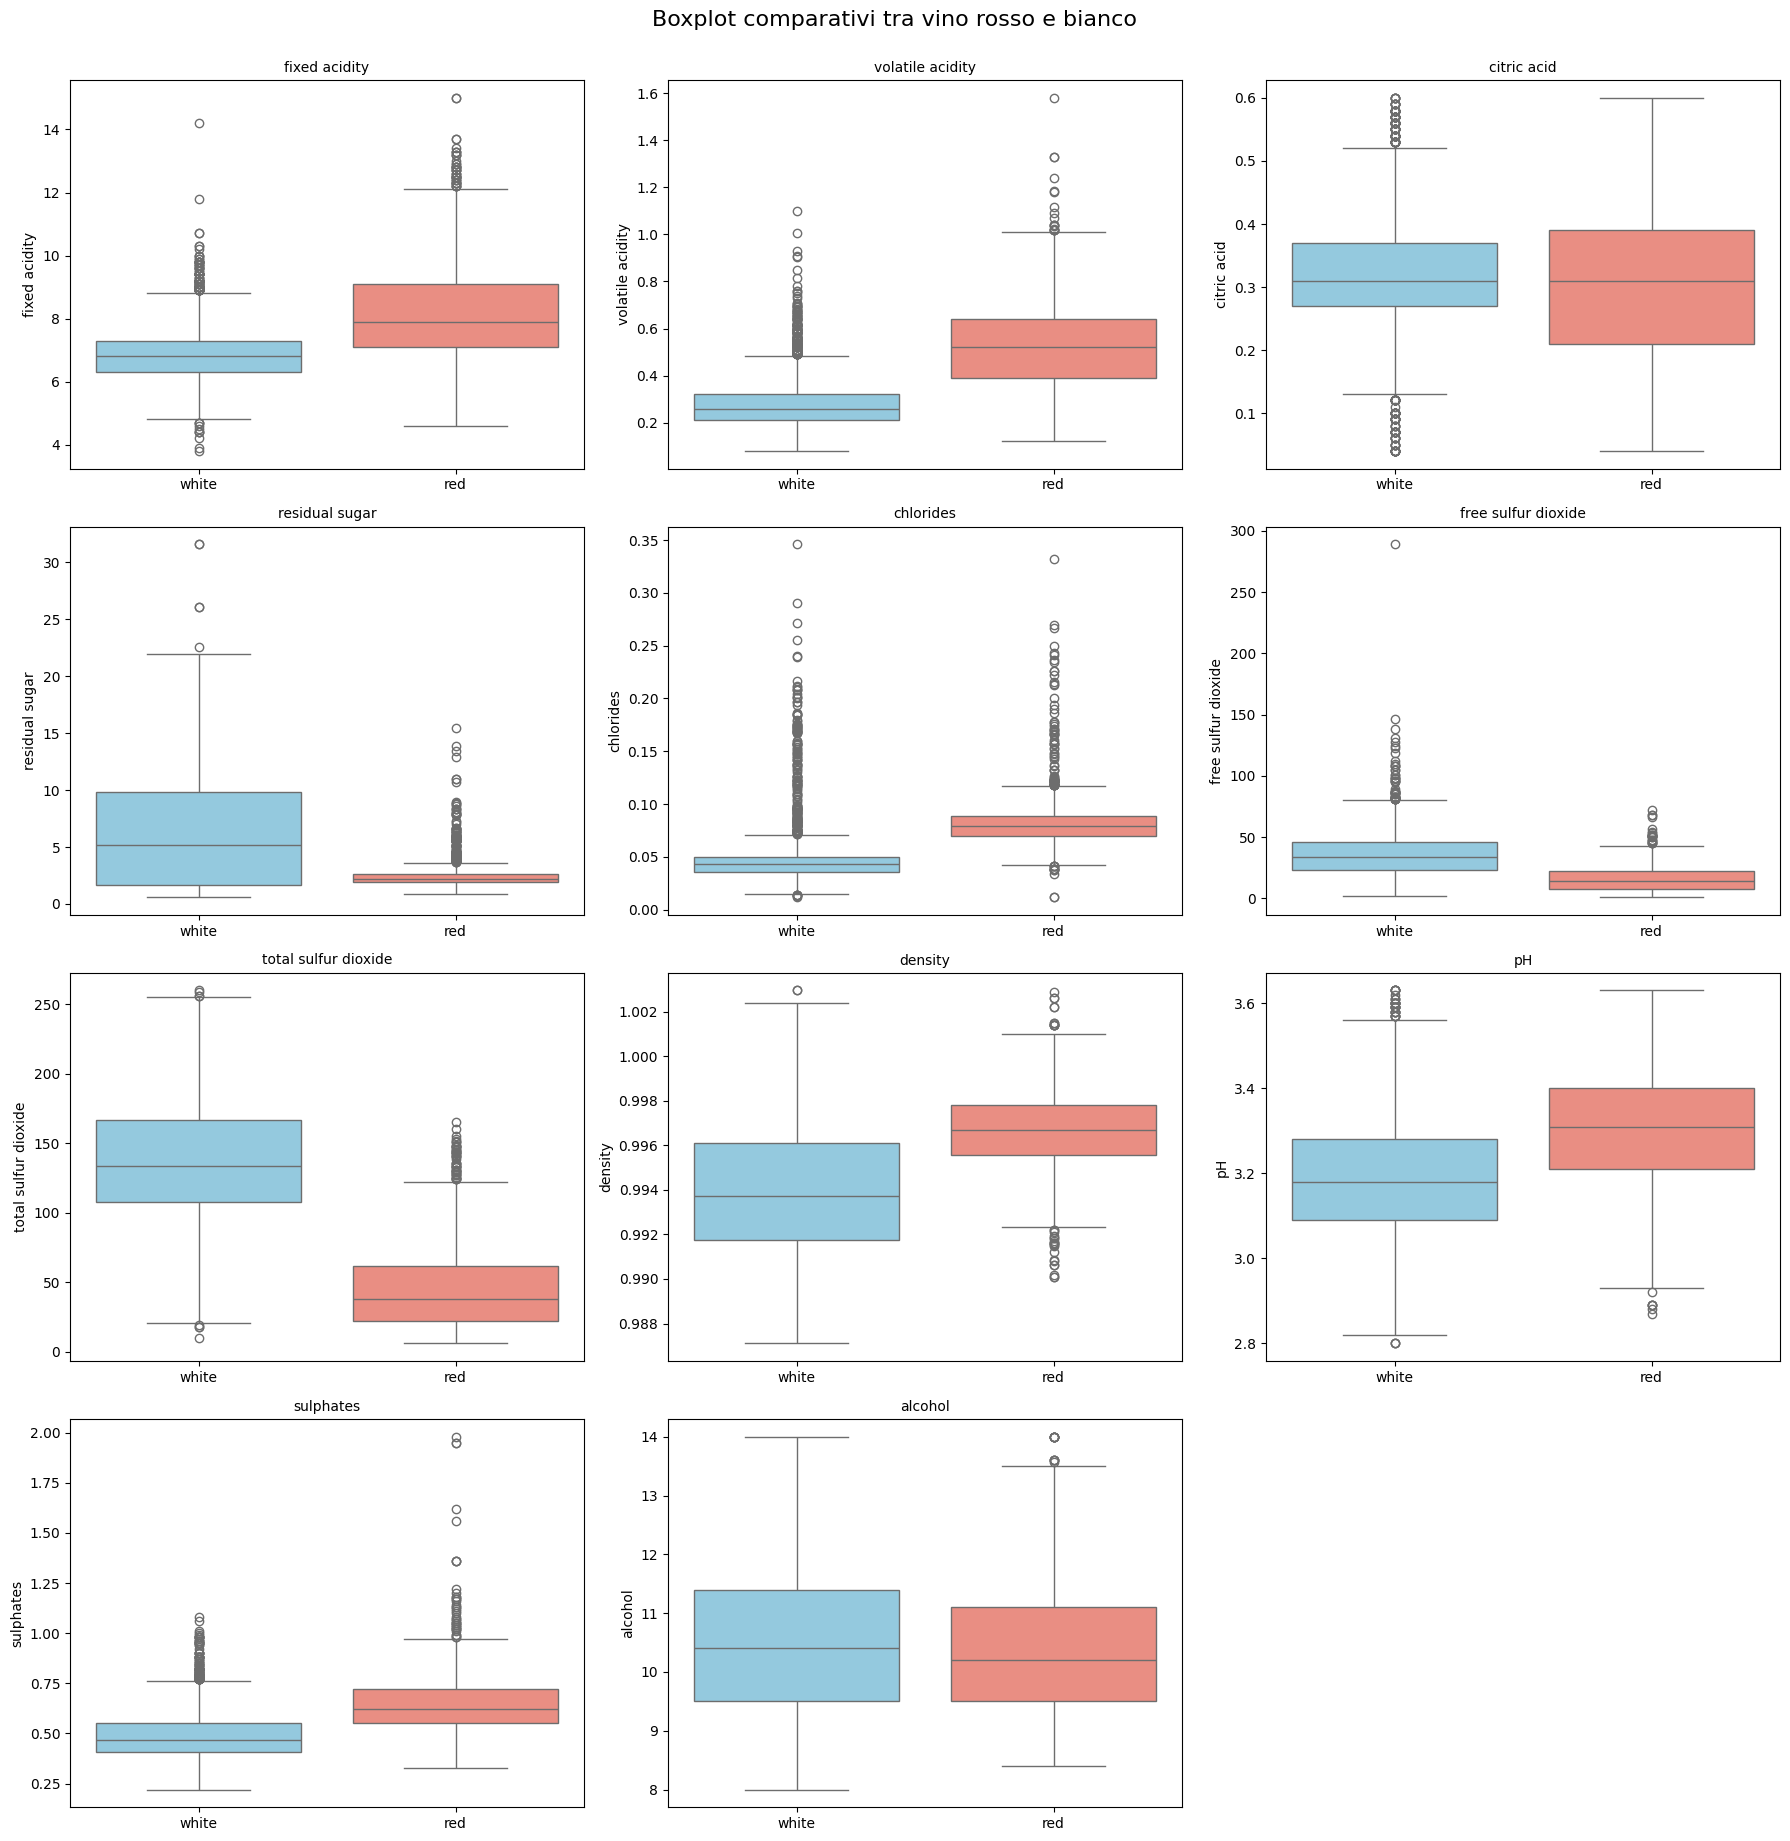

In [ ]:
"""
Confronto le distribuzioni chimiche tra vini rossi e bianchi
Osservo: Le differenze nella posizione delle mediane e la larghezza delle distribuzioni tra rosso e bianco.

"""

# Lista delle variabili chimiche
variables = [
    'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
    'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
    'pH', 'sulphates', 'alcohol'
]

# Impostazione del layout della griglia
n_rows = 4
n_cols = 3

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 18))
axes = axes.flatten()

for i, var in enumerate(variables):
    sns.boxplot(
        data=dfFinal,
        x='type',
        y=var,
        hue='type',         # AGGIUNTO
        ax=axes[i],
        palette=['skyblue', 'salmon'],
        legend=False        # AGGIUNTO
    )
    axes[i].set_title(f'{var}', fontsize=10)
    axes[i].set_xlabel('')
    axes[i].set_ylabel(var)

# Rimuove assi vuoti se presenti
for j in range(len(variables), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
fig.suptitle('Boxplot comparativi tra vino rosso e bianco', fontsize=16, y=1.02)
plt.show()

In [ ]:
"""
Confronto la qualità media dei vini rossi e bianchi
"""

dfFinal.groupby('type')['quality'].describe()

,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
red,1546.0,5.636481,0.807610,3.0,5.0,6.0,6.0,8.0
white,4886.0,5.879861,0.884586,3.0,5.0,6.0,6.0,9.0


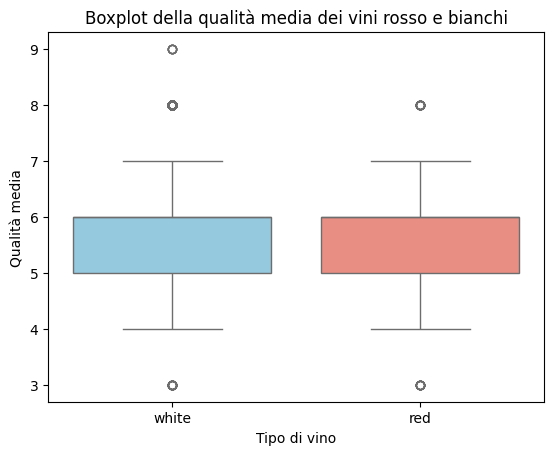

In [ ]:
"""
Box plot per Confrontare la qualità media dei vini rosso e bianchi
"""
sns.boxplot(data=dfFinal, x='type', y='quality', hue='type', palette=['skyblue', 'salmon'], legend=False)
plt.title('Boxplot della qualità media dei vini rosso e bianchi')
plt.xlabel('Tipo di vino')
plt.ylabel('Qualità media')
plt.show()

In [ ]:
"""
Future engineering: Creo categorie di qualità

"""

#Stampo le qualità dei vini
quality = dfFinal['quality'].unique()
print(quality)

dfFinal['quality_cat'] = pd.cut(
    dfFinal['quality'],
    bins=[-1, 5, 7, 10],
    labels=['Low', 'Medium', 'High']
)
dfFinal['quality_cat'].value_counts()



[6 5 7 8 4 3 9]


,count
quality_cat,
Medium,3886
Low,2349
High,197


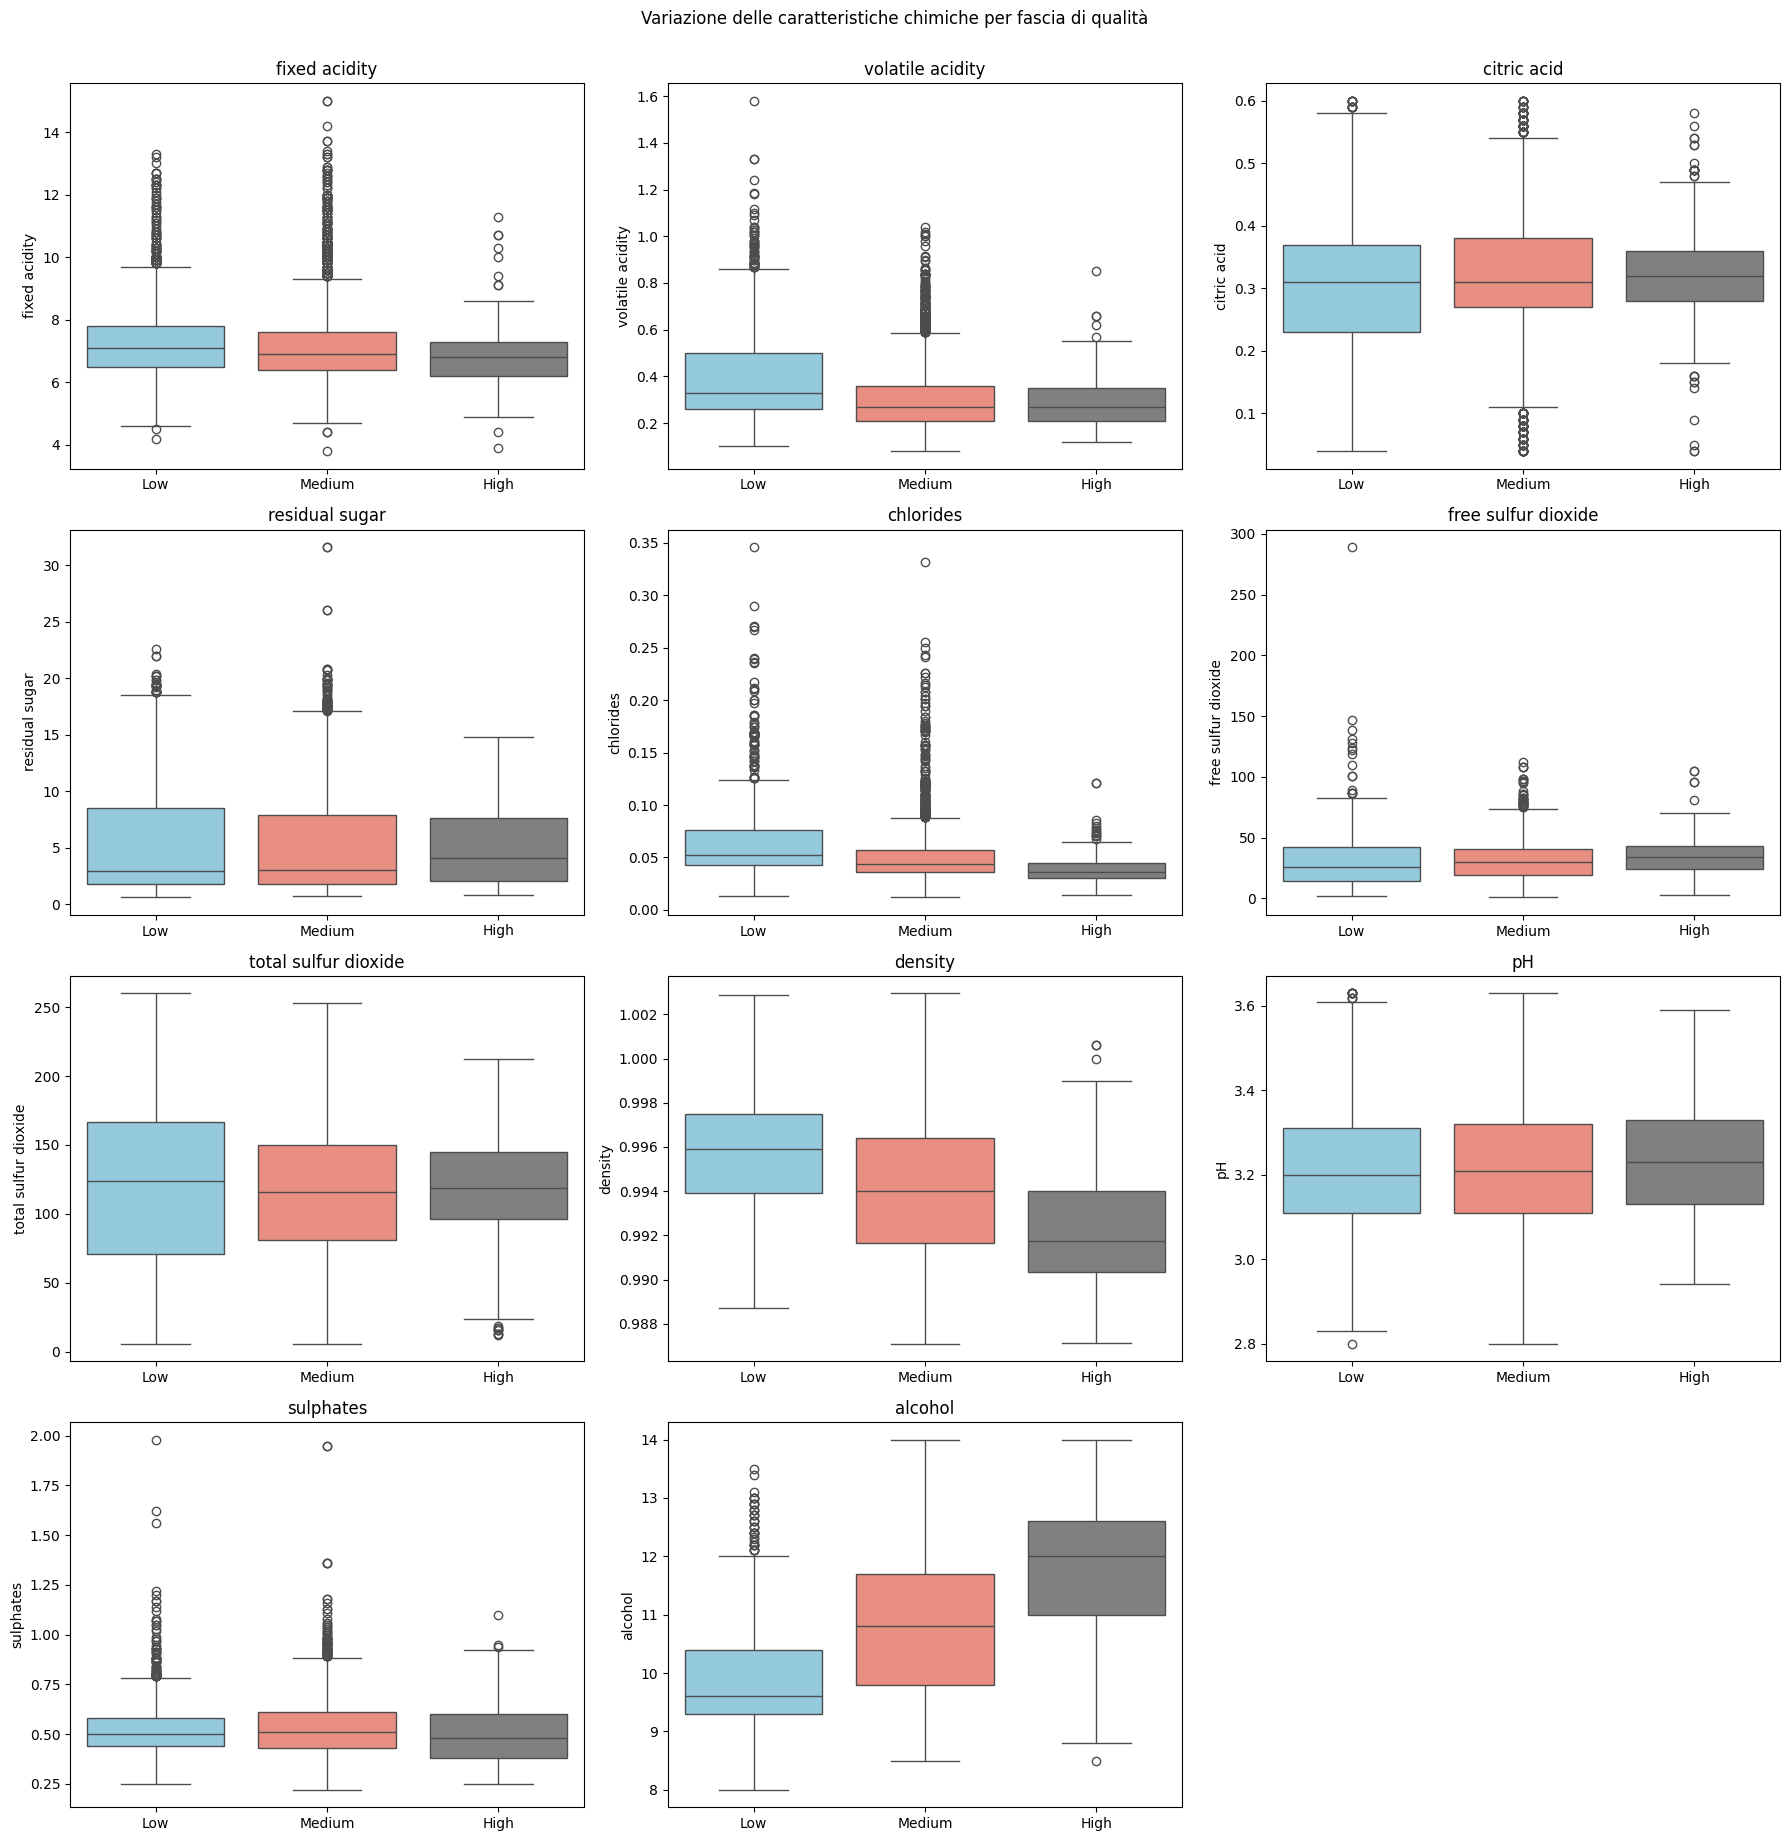

In [ ]:
"""
Visualizzo le differenze chimiche tra le fasce di qualità

"""

variables = [
    'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
    'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
    'pH', 'sulphates', 'alcohol'
]

fig, axes = plt.subplots(4, 3, figsize=(18, 18))
axes = axes.flatten()

for i, var in enumerate(variables):
    sns.boxplot(
        data=dfFinal,
        x='quality_cat',
        y=var,
        hue='quality_cat',
        legend=False,
        palette=['skyblue', 'salmon', 'grey'],
        ax=axes[i]
    )
    axes[i].set_title(var)
    axes[i].set_xlabel('')
    axes[i].set_ylabel(var)

for j in range(len(variables), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
fig.suptitle('Variazione delle caratteristiche chimiche per fascia di qualità', y=1.02)
plt.show()

In [ ]:
"""
Riepilogo statistico per fascia di qualità
Questo fornisce un quadro tabellare di come cambiano le medie e dispersioni.


"""
dfFinal.groupby('quality_cat')[variables].agg(['mean', 'std', 'median'])

/tmp/ipython-input-22-2785387363.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dfFinal.groupby('quality_cat')[variables].agg(['mean', 'std', 'median'])


fixed acidity                  volatile acidity                   \
                     mean       std median             mean       std median   
quality_cat                                                                    
Low              7.300851  1.208177    7.1         0.394825  0.186996   0.33   
Medium           7.140594  1.265702    6.9         0.305636  0.138522   0.27   
High             6.820812  1.071440    6.8         0.291091  0.118416   0.27   

            citric acid                  residual sugar  ...  density  \
                   mean       std median           mean  ...   median   
quality_cat                                              ...            
Low            0.304321  0.119456   0.31       5.641613  ...  0.99592   
Medium         0.323641  0.096528   0.31       5.317666  ...  0.99400   
High           0.329340  0.088474   0.32       5.367005  ...  0.99176   

                   pH                  sulphates                     alcohol  \
                 mean       std median      mean       std median       mean   
quality_cat                                                                    
Low          3.212201  0.151206   3.20  0.518106  0.128434   0.50   9.871873   
Medium       3.215934  0.150960   3.21  0.533747  0.146752   0.51  10.803847   
High         3.224518  0.150795   3.23  0.509746  0.163396   0.48  11.701015   

                              
                  std median  
quality_cat                   
Low          0.827959    9.6  
Medium       1.195485   10.8  
High         1.269300   12.0  

[3 rows x 33 columns]

In [ ]:
"""
Ttest - Test statistico per confermare differenze

Il p-value indica la probabilità di osservare una differenza tra i gruppi così grande (o più grande)
se in realtà non ci fosse differenza reale (cioè, sotto l'ipotesi nulla).

Un p-value piccolo (tipicamente < 0.05) suggerisce che la differenza tra i gruppi è statisticamente significativa: possiamo
rifiutare l'ipotesi nulla e dire che c'è probabilmente una differenza vera nella media della variabile tra quei due gruppi.

Un p-value grande (>= 0.05) indica che non abbiamo prove sufficienti per dire che le medie siano diverse tra i due gruppi.

"""

categories = ['Low', 'Medium', 'High']

for var in variables:
    print(f"Variabile: {var}")
    for i in range(len(categories)):
        for j in range(i+1, len(categories)):
            grp = dfFinal[['quality_cat', var]]
            group1 = grp[grp['quality_cat'] == categories[i]][var]
            group2 = grp[grp['quality_cat'] == categories[j]][var]
            stat, p = ttest_ind(group1, group2, equal_var=False)
            print(f"  {categories[i]} vs {categories[j]}: p-value = {p:.4f}")
    print()


Variabile: fixed acidity
  Low vs Medium: p-value = 0.0000
  Low vs High: p-value = 0.0000
  Medium vs High: p-value = 0.0001

Variabile: volatile acidity
  Low vs Medium: p-value = 0.0000
  Low vs High: p-value = 0.0000
  Medium vs High: p-value = 0.0969

Variabile: citric acid
  Low vs Medium: p-value = 0.0000
  Low vs High: p-value = 0.0003
  Medium vs High: p-value = 0.3809

Variabile: residual sugar
  Low vs Medium: p-value = 0.0096
  Low vs High: p-value = 0.3819
  Medium vs High: p-value = 0.8720

Variabile: chlorides
  Low vs Medium: p-value = 0.0000
  Low vs High: p-value = 0.0000
  Medium vs High: p-value = 0.0000

Variabile: free sulfur dioxide
  Low vs Medium: p-value = 0.0020
  Low vs High: p-value = 0.0001
  Medium vs High: p-value = 0.0043

Variabile: total sulfur dioxide
  Low vs Medium: p-value = 0.0005
  Low vs High: p-value = 0.7322
  Medium vs High: p-value = 0.1781

Variabile: density
  Low vs Medium: p-value = 0.0000
  Low vs High: p-value = 0.0000
  Medium vs Hig